# Plot average performances per block

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import os

### Load data

In [7]:
dname = os.getcwd() + '/data_v2_quotes/'
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts\\data_loading/data_v2_quotes/'

In [8]:
ACCURACY = np.load(dname + 'ACCURACY_New.npy')
acc_first_prop = np.load(dname + 'Acc_first_prop_New.npy')
acc_second_prop = np.load(dname + 'acc_second_prop_New.npy')
acc_third_prop = np.load(dname + 'acc_third_prop_New.npy')

In [9]:
n_sujs, n_blocs, n_trials = ACCURACY.shape
# ACCURACY.shape
acc_first_prop.shape
acc_second_prop.shape
ACCURACY[0,:,:]

array([[0.33333333, 1.        , 0.33333333, 0.33333333, 0.        ,
        0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.66666667,
        0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.33333333,
        0.33333333],
       [1.        , 1.        , 0.33333333, 0.66666667, 0.33333333,
        1.        , 0.66666667, 1.        , 0.66666667, 0.66666667,
        0.33333333, 0.66666667, 0.66666667, 0.33333333, 0.66666667,
        0.66666667],
       [0.66666667, 0.33333333, 0.33333333, 0.66666667, 1.        ,
        0.33333333, 0.66666667, 0.66666667, 0.66666667, 1.        ,
        0.33333333, 0.66666667, 0.66666667, 0.33333333, 1.        ,
        1.        ],
       [1.        , 0.66666667, 1.        , 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ,
        1.        , 1.        , 0.33333333, 1.        , 0.66666667,
        1.        ],
       [1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 0.66666667, 

### Plotting parameters

In [10]:
cmap = matplotlib.cm.get_cmap('Set1')
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

In [11]:
bloc_type_colors = {
    'training': cmap(norm(0)),
    'generalization': cmap(norm(.2))
}

# Figure 1 - Accuracy

Plotting function

In [33]:
# from sqlalchemy import false


def plot_accuracy(subj_means, block_mean, block_se, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    # Average per bloc
    for i in range(n_blocs):
        ax.errorbar(
            x = i,
            y = block_mean[i],
            yerr = block_se[i],
            color = cmap(norm(.2)),
            markersize = 5,
            marker = 'D',
            alpha = 1
        )
    # Individual data
    for i in range(n_blocs):
        ax.plot(
            np.ones(n_sujs) * i + np.random.normal(0, 0.05, (n_sujs)), 
            subj_means[:, i],
            color = cmap(norm(.2)),
            markersize = 3,
            marker = 'o',
            alpha = 0.5, 
            lw = 0
        )
    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )
    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    plt.tight_layout()
    fig.savefig(fig_name)
    

### Compute group average

In [34]:
ACCURACY_M_SUJS = np.nanmean(ACCURACY, axis=2)
ACCURACY_M = np.mean(ACCURACY_M_SUJS, axis=0)
# ACCURACY_SE = np.std(ACCURACY_M_SUJS, axis=0)/np.sqrt(n_sujs)
ACCURACY_M


array([0.56292517, 0.67304422, 0.71853741, 0.76573129, 0.78018707,
       0.79209184, 0.79889456, 0.82823129])

In [46]:
ACCURACY_SE = np.sqrt(ACCURACY_M*(1-ACCURACY_M))/np.sqrt(n_sujs)
ACCURACY_SE

array([0.07086066, 0.06701442, 0.06424465, 0.06050584, 0.05915997,
       0.05797296, 0.05726096, 0.05388276])

### Plot

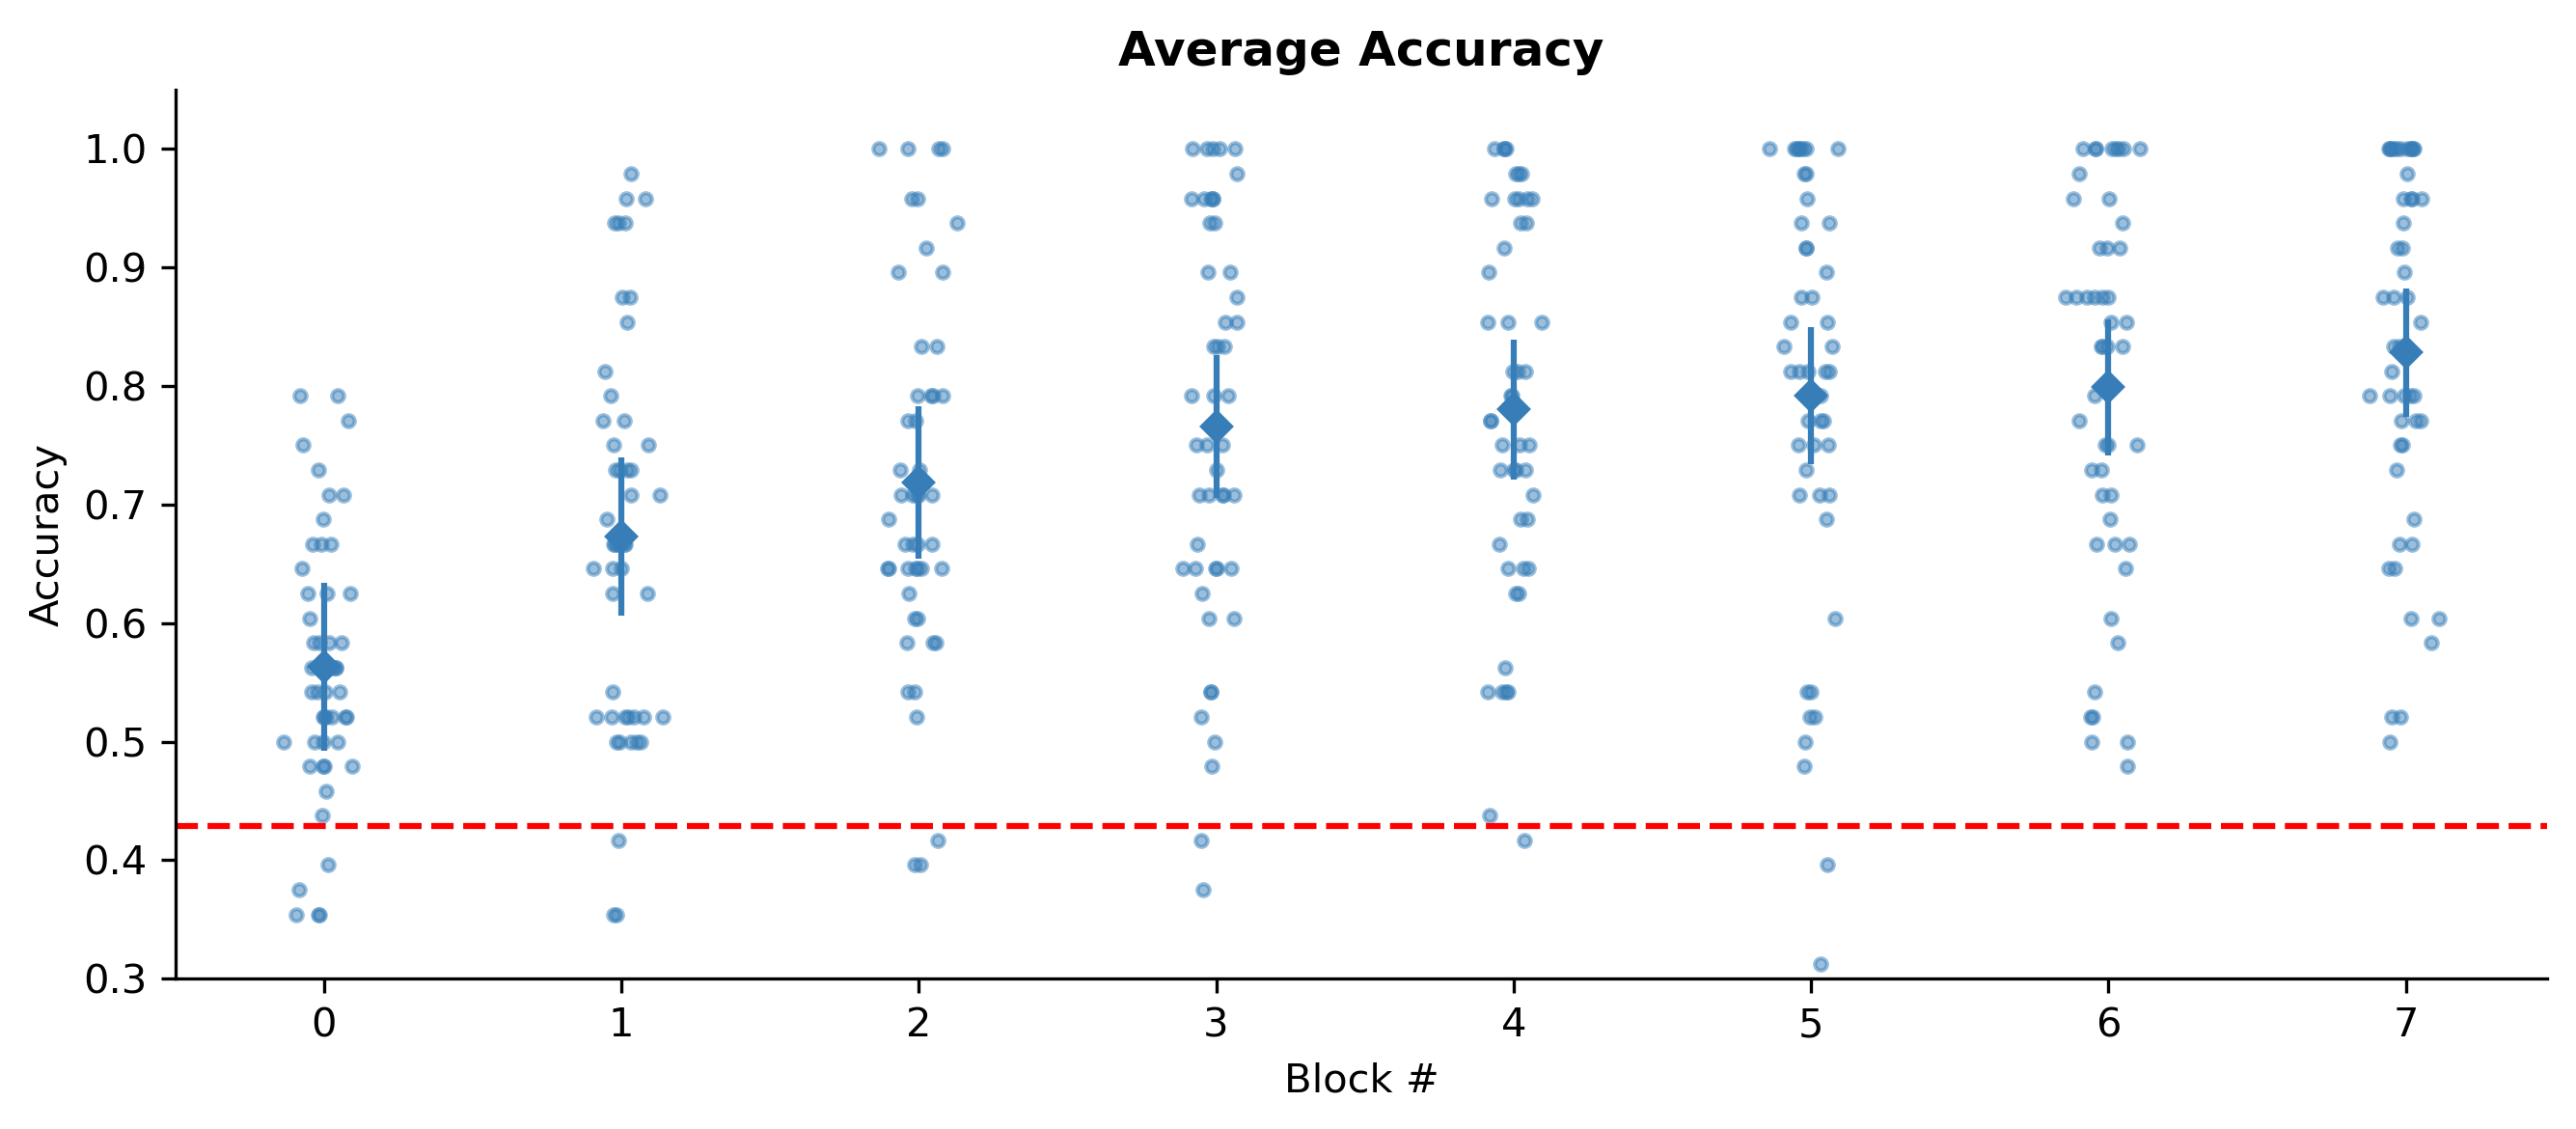

In [36]:

func_name = 'figures_new/fig_1_new.svg'
fig_title = 'Average Accuracy'
chance_level = 9/21
plot_accuracy(ACCURACY_M_SUJS, ACCURACY_M, ACCURACY_SE,func_name,fig_title, chance_level=chance_level)


Compute the average for the first property

In [50]:
subj_acc_first = np.nanmean(acc_first_prop, axis=2)
mean_acc_first = np.mean(subj_acc_first, axis=0)
# se_acc_first = np.std(subj_acc_first, axis=0)/np.sqrt(n_sujs)
se_acc_first = np.sqrt(mean_acc_first*(1-mean_acc_first))/np.sqrt(n_sujs)
se_acc_first

[0.46402633 0.36844145 0.29412889 0.25965015 0.24885201 0.24885201
 0.22003937 0.19183606]


array([0.06628948, 0.05263449, 0.04201841, 0.03709288, 0.03555029,
       0.03555029, 0.0314342 , 0.02740515])

Plot

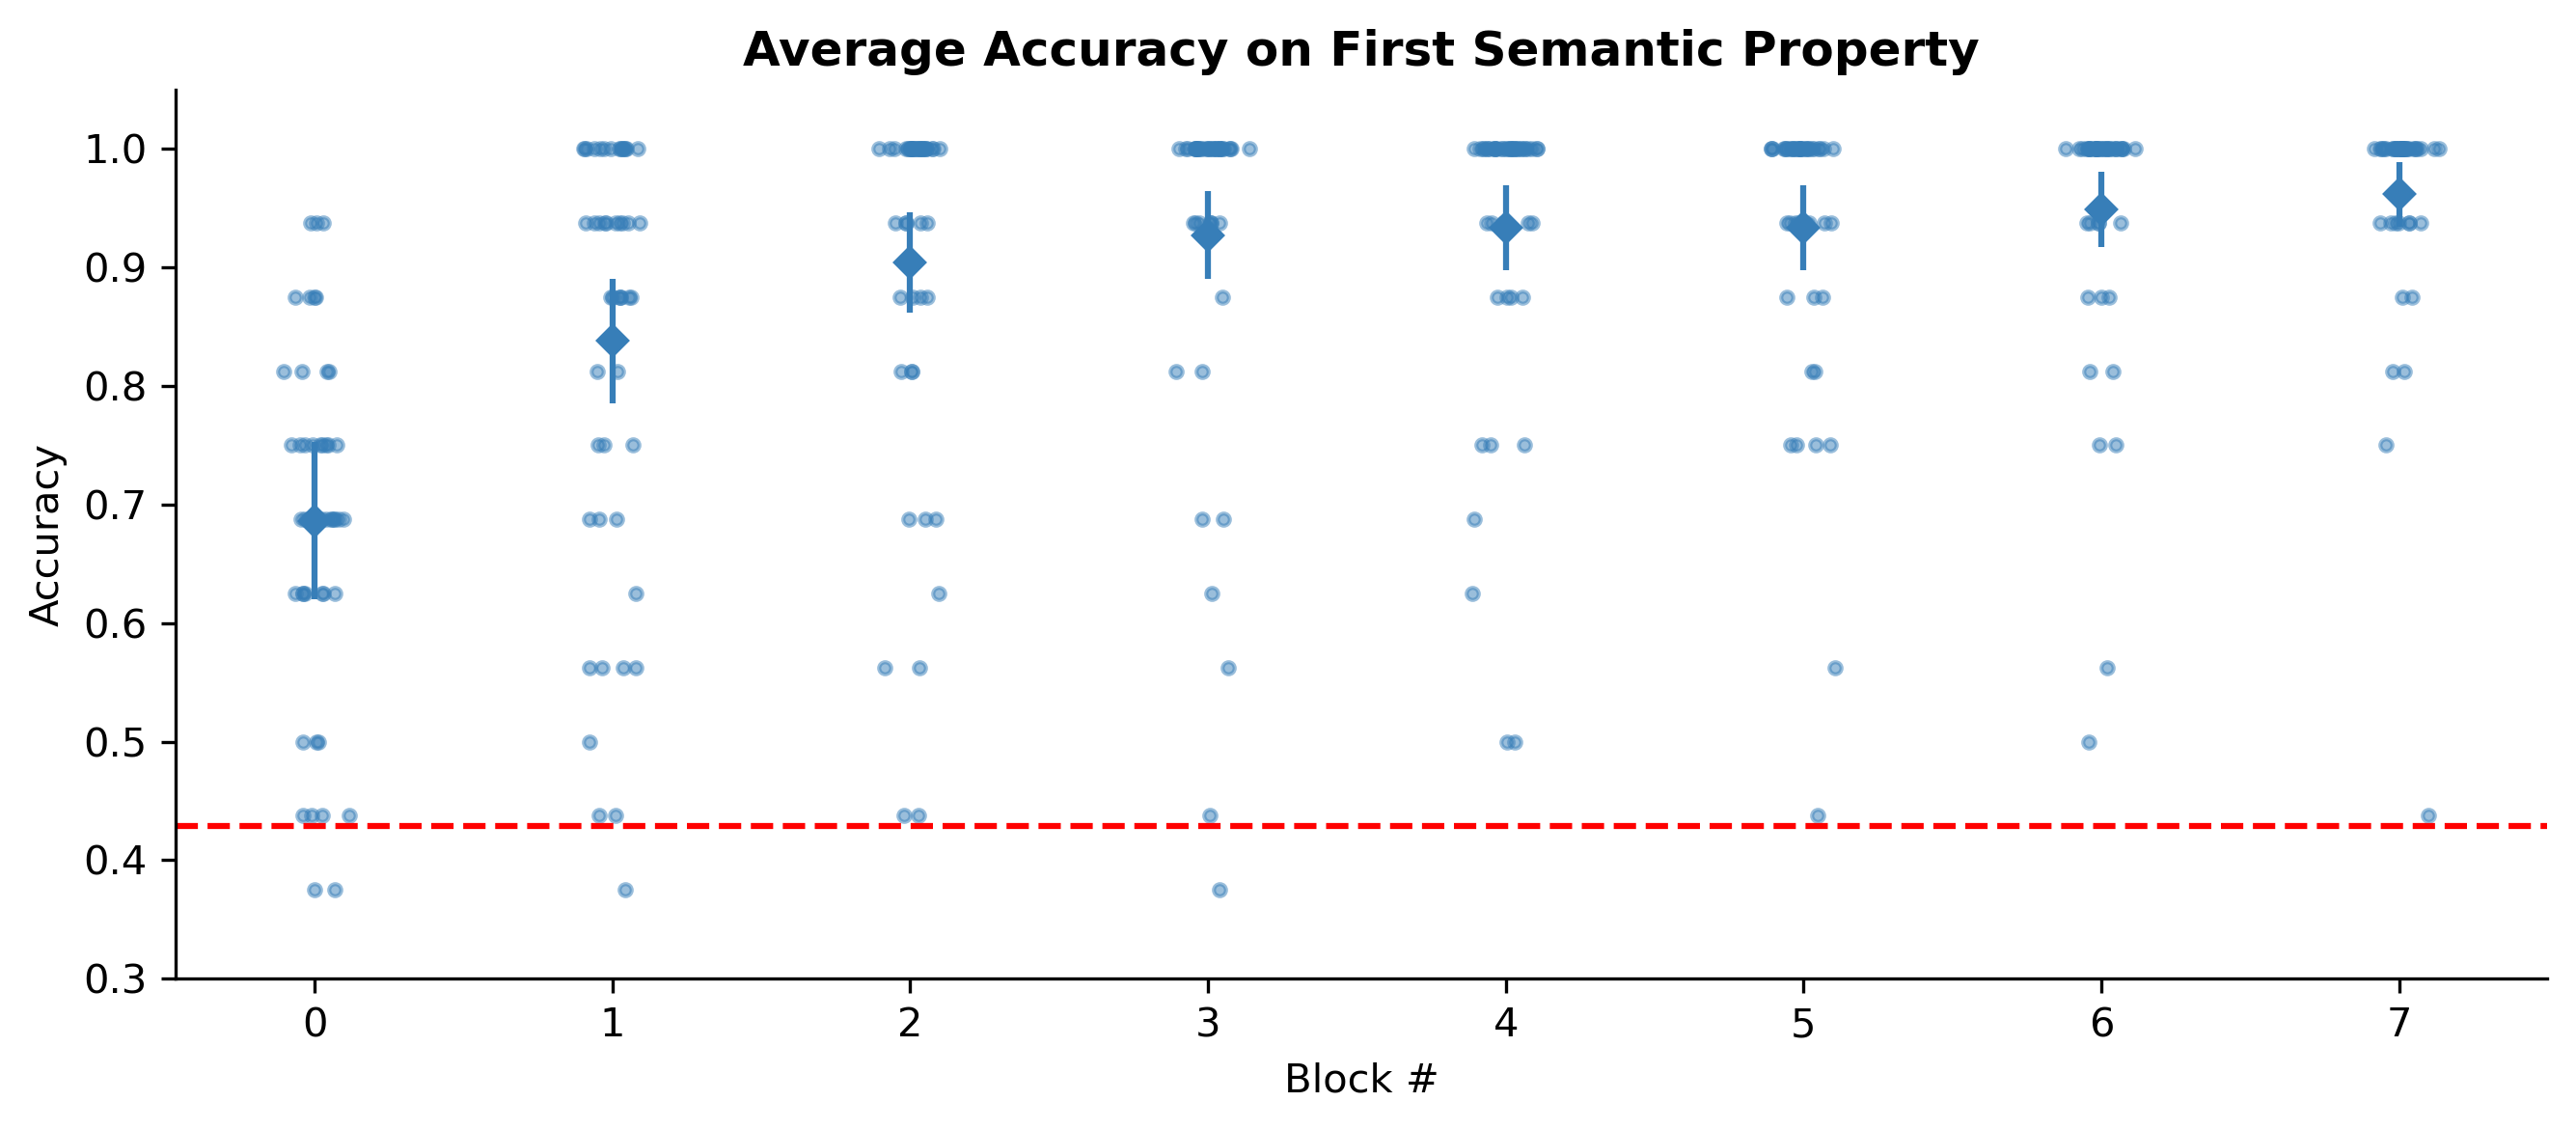

In [51]:
func_name = 'figures_new/fig_2_new.svg'
fig_title = 'Average Accuracy on First Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_first, mean_acc_first, se_acc_first, func_name, fig_title, chance_level=chance_level)

Compute average for the second property

In [52]:
subj_acc_second = np.nanmean(acc_second_prop, axis=2)
mean_acc_second = np.mean(subj_acc_second, axis=0)
# se_acc_second = np.std(subj_acc_second, axis=0)/np.sqrt(n_sujs)
se_acc_second = np.sqrt(mean_acc_second*(1-mean_acc_second))/np.sqrt(n_sujs)
mean_acc_second.shape

(8,)

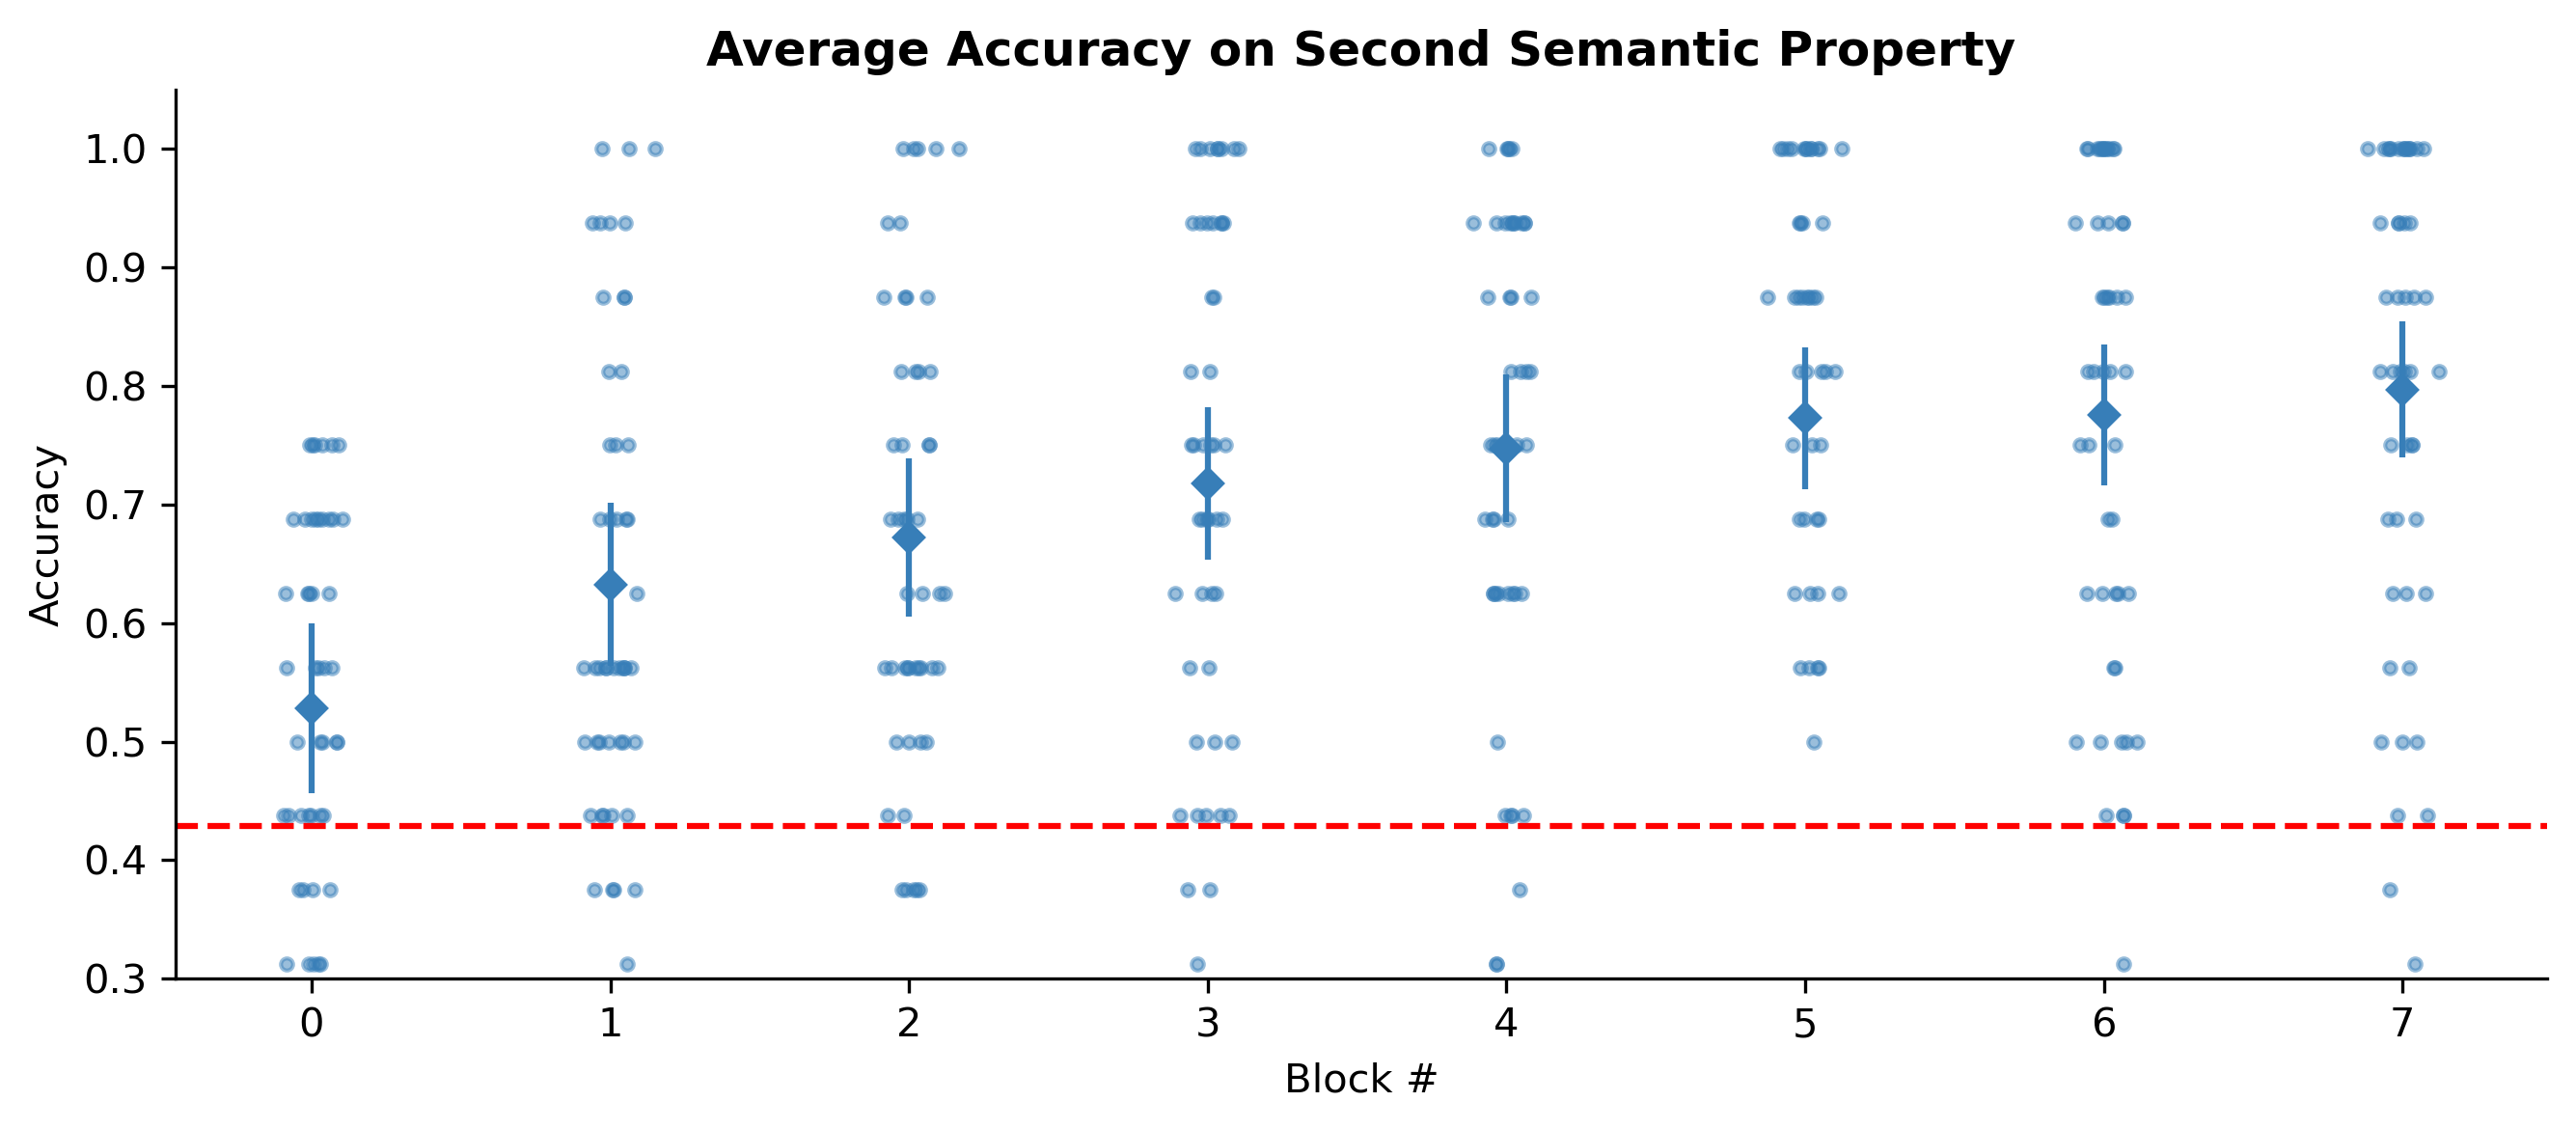

In [53]:
# Define figure
func_name = 'figures_new/fig_3_new.svg'
fig_title = 'Average Accuracy on Second Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_second, mean_acc_second, se_acc_second, func_name, fig_title, chance_level=chance_level)

In [55]:
subj_acc_third = np.nanmean(acc_third_prop, axis=2)
mean_acc_third = np.mean(subj_acc_third, axis=0)
# se_acc_third = np.std(subj_acc_third, axis=0)/np.sqrt(n_sujs)
se_acc_third = np.sqrt(mean_acc_third*(1-mean_acc_third))/np.sqrt(n_sujs)
mean_acc_third.shape

(8,)

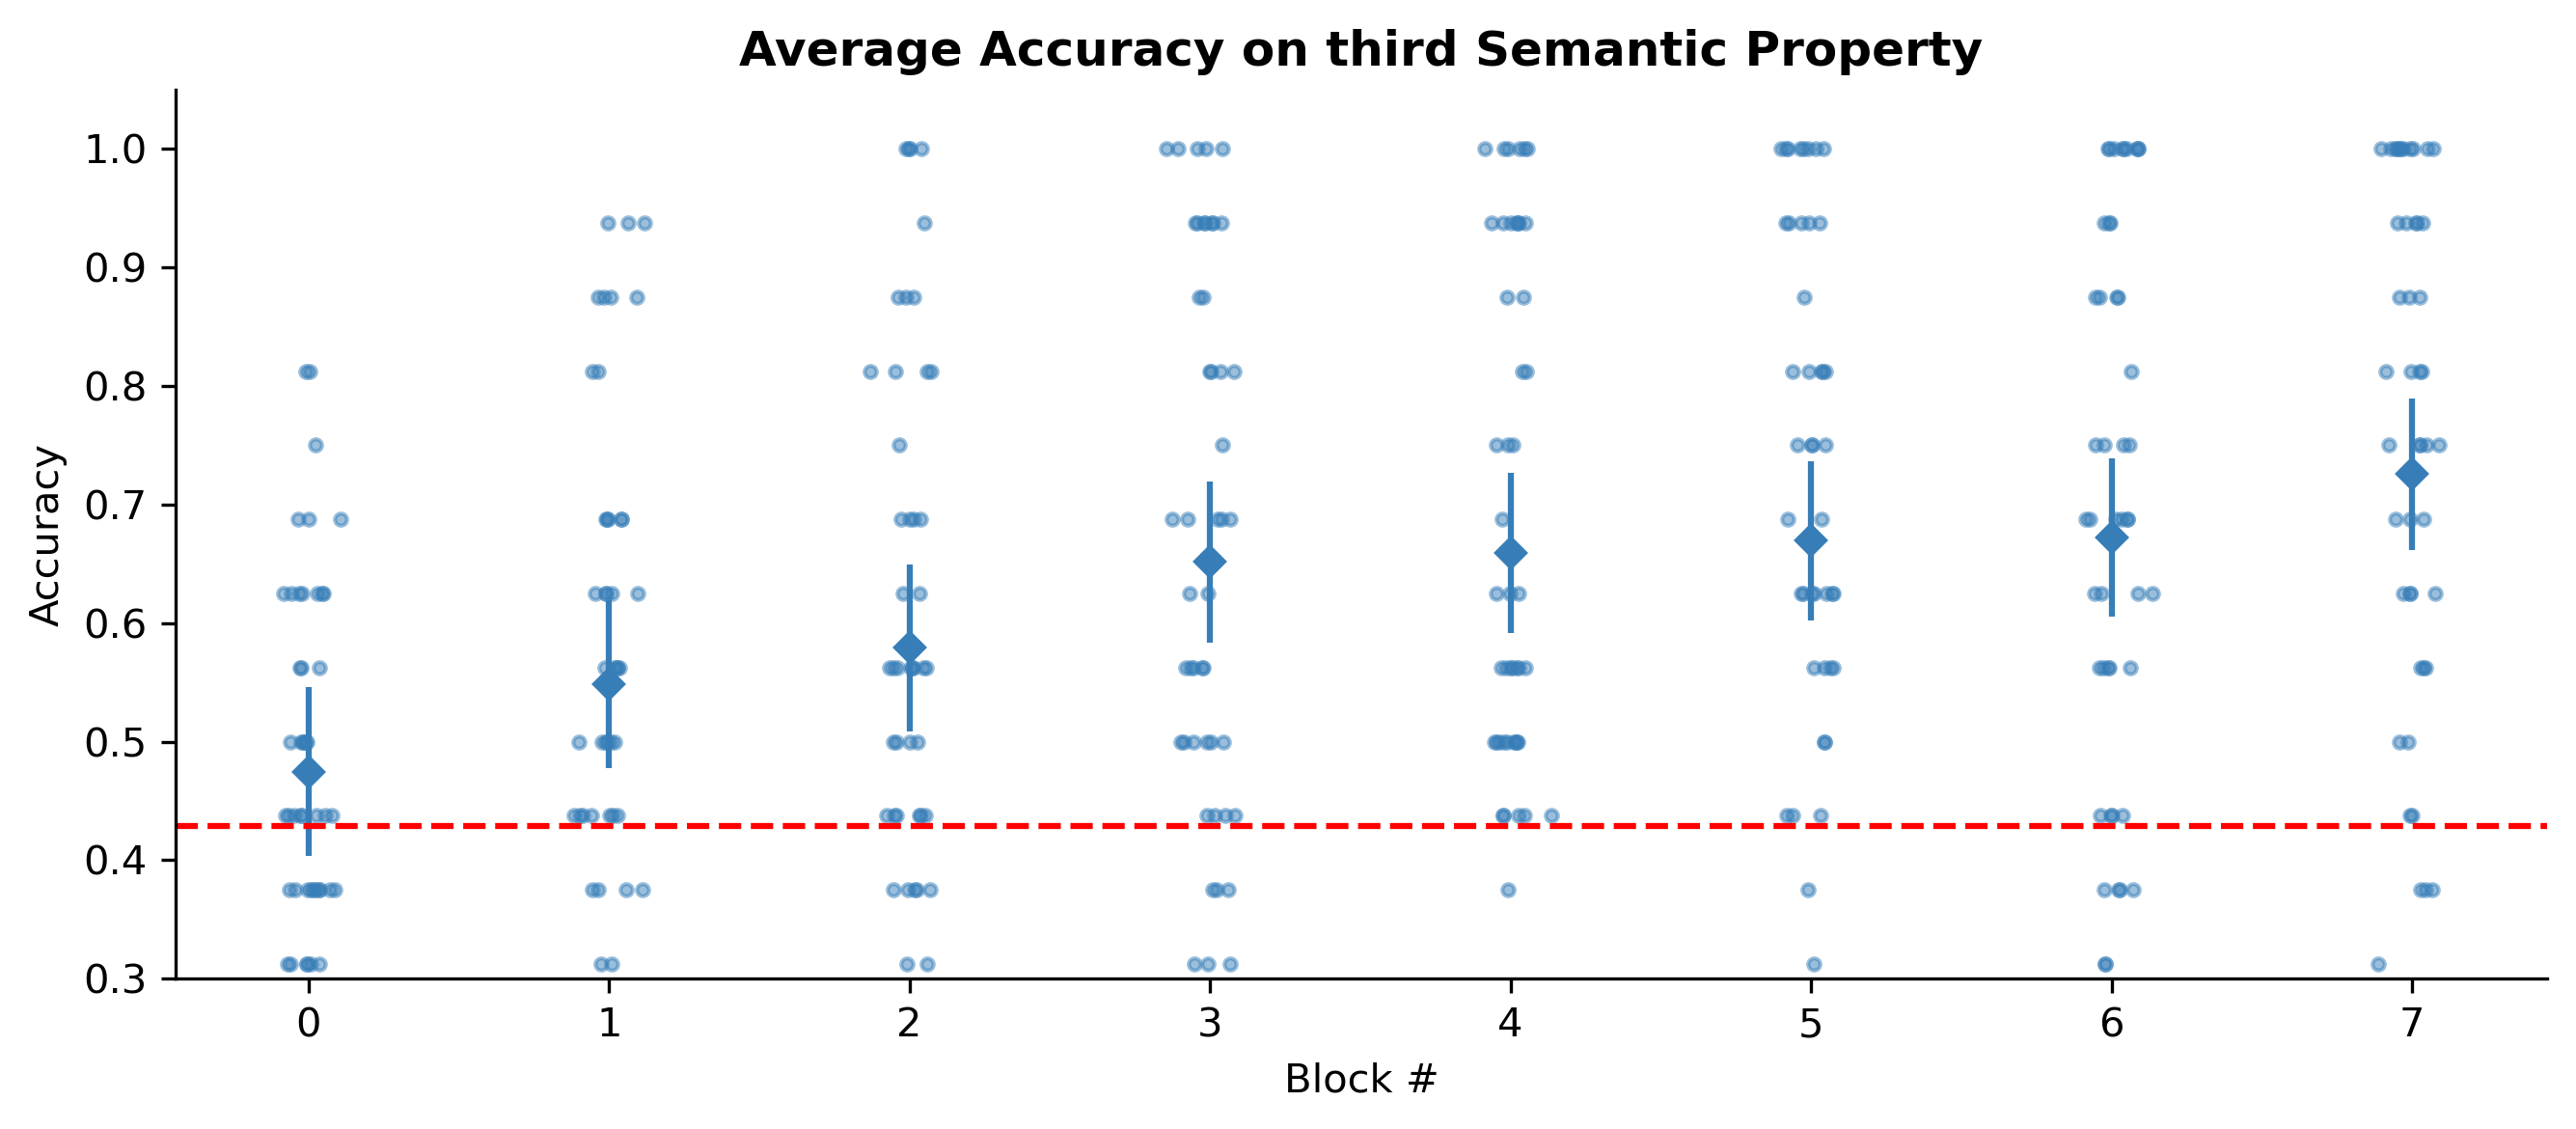

In [56]:
# Define figure
func_name = 'figures_new/fig_4_new.svg'
fig_title = 'Average Accuracy on third Semantic Property'
chance_level = 3/7
plot_accuracy(subj_acc_third, mean_acc_third, se_acc_third, func_name, fig_title, chance_level=chance_level)

Make a plot for all distinctions

In [17]:
# lists for plotting

from matplotlib.transforms import Transform


def plot_accuracy_all_dist(block_mean_list, block_se_list, fig_name, fig_title, chance_level=False):
    # Define figure
    fig, ax = plt.subplots(1, 1, figsize=(9, 4), dpi=300, facecolor='w')

    color_list = ['#fd7f6f', '#bd7ebe', '#8bd3c7']
    marker_list = ['o', 'D', 's']

    offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
    trans = plt.gca().transData
    tran_list = [-8, 0, 8]

    # label list
    label_list = ["First Property", "Second Property", "Third Property"]

    # Average per bloc
    for j, means in enumerate(block_mean_list):
        ax.errorbar(
            x = np.arange(0, n_blocs),
            y = block_mean_list[j],
            yerr = block_se_list[j],
            color = color_list[j],
            markersize = 5,
            marker =  marker_list[j],
            alpha = 1,
            # linestyle='',
            # transform= trans+offset(tran_list[j]),
            label = label_list[j]
        )

    if chance_level:
        ax.axhline(y=chance_level, color='r', linestyle='--' )

    # Aesthetics
    ax.set_title(fig_title, fontweight='bold')
    ax.set_ylim(0.3, 1.05)
    ax.set_xlabel('Block #')
    ax.set_ylabel('Accuracy')

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # legend
    leg = ax.legend(loc=(.75, .1))

    plt.tight_layout()
    fig.savefig(fig_name)

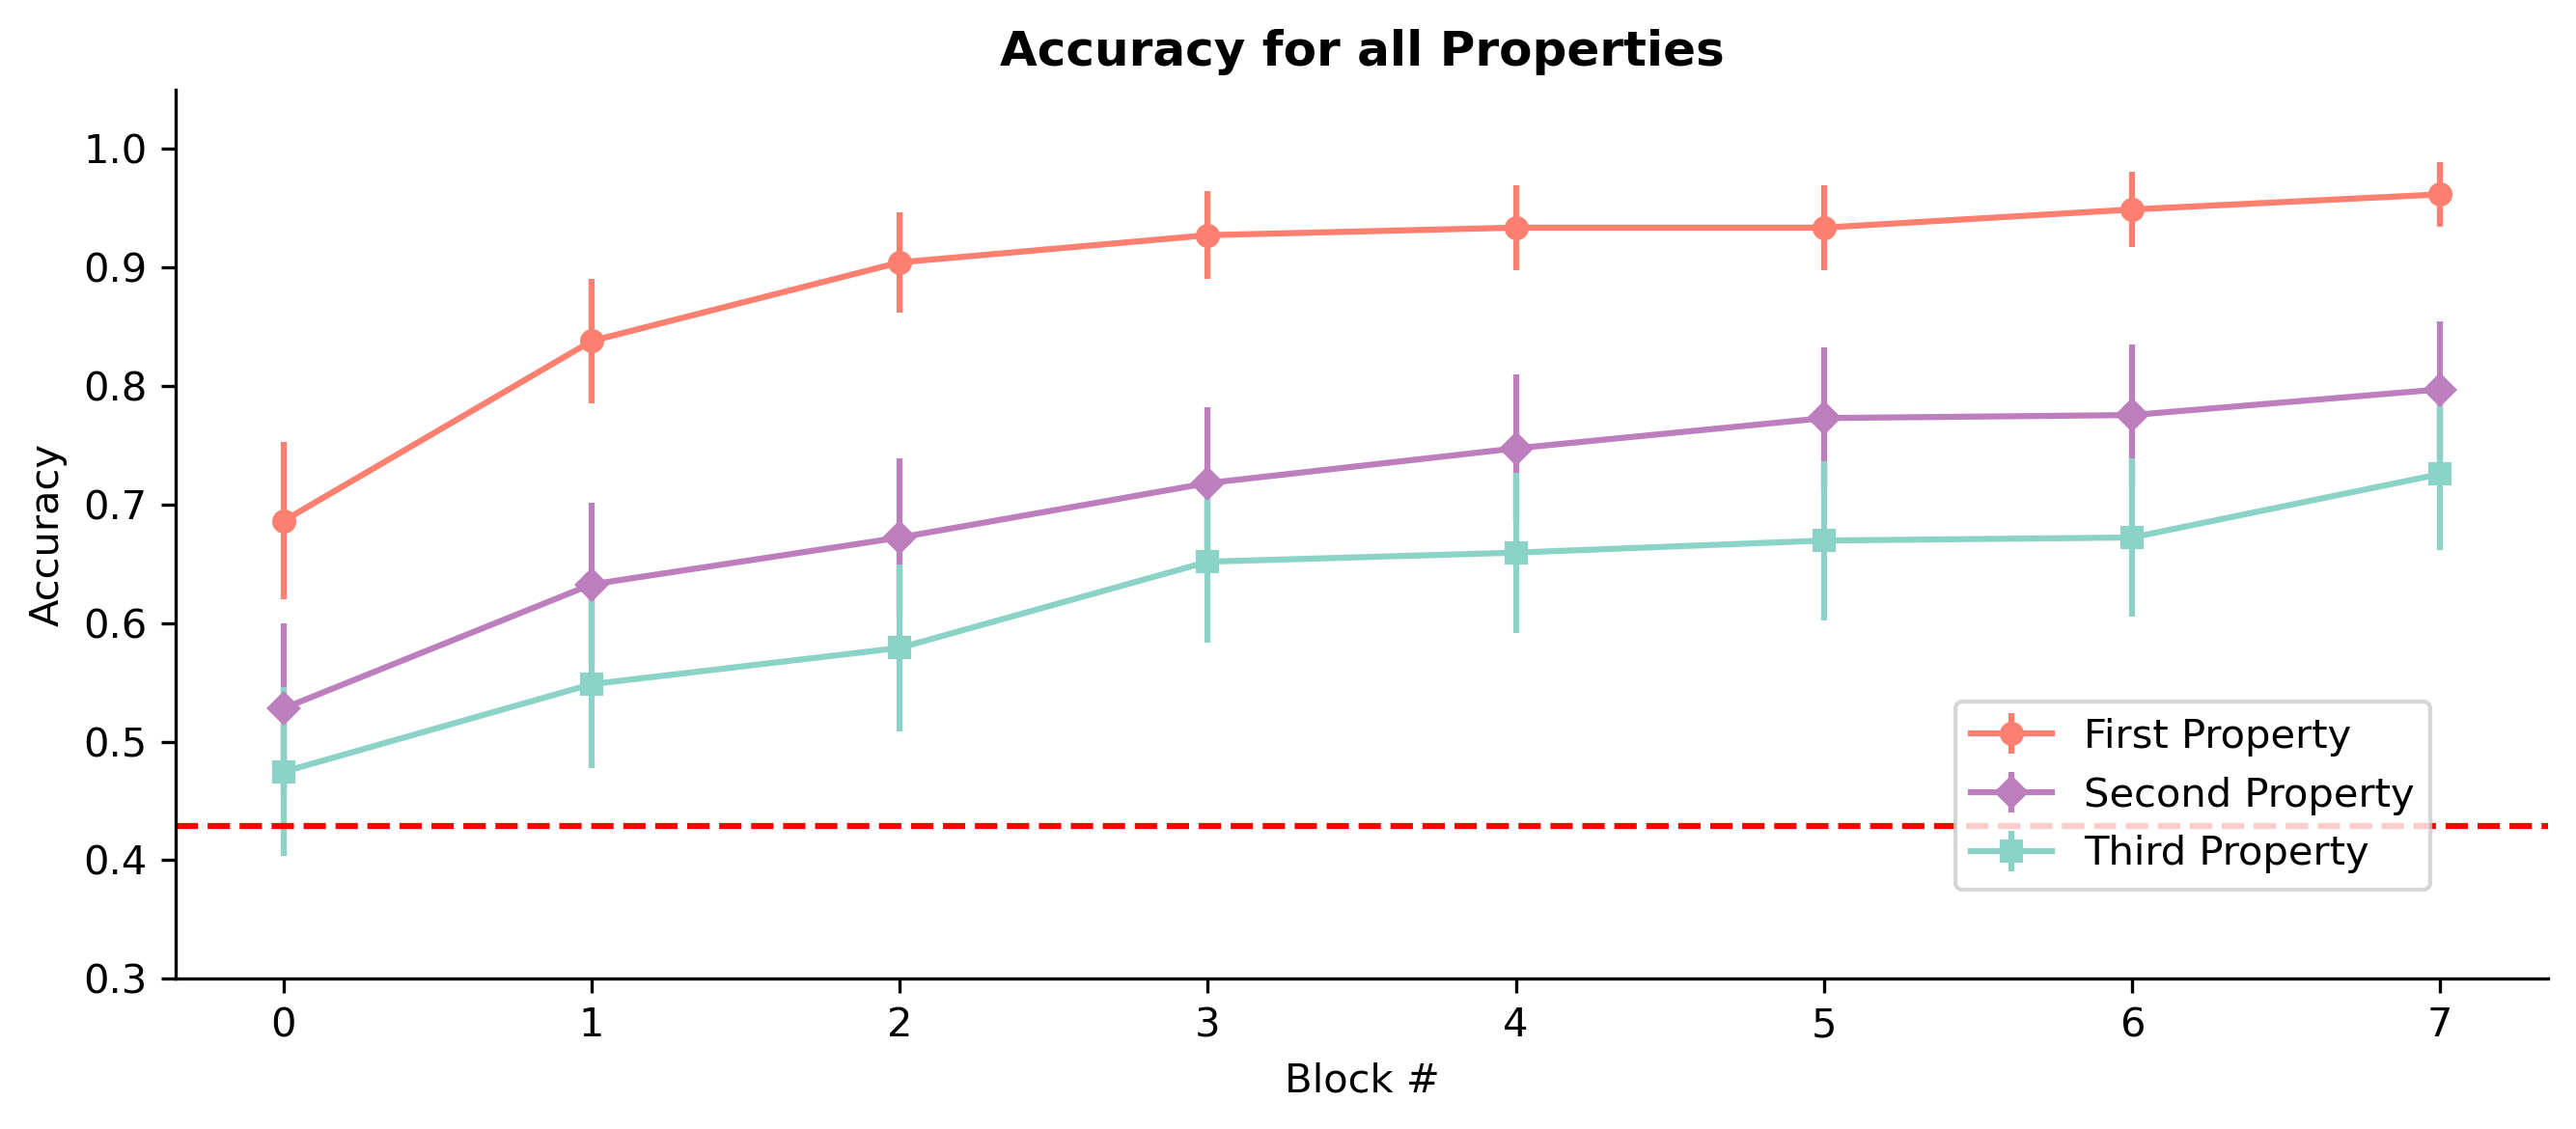

In [57]:
mean_list = [mean_acc_first, mean_acc_second, mean_acc_third]
se_list   = [se_acc_first, se_acc_second, se_acc_third]
plot_accuracy_all_dist(mean_list, se_list, "figures_new/combined_properties_new.svg", "Accuracy for all Properties", chance_level=3/7)